In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("heart_disease.csv",names=["Age","Sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"])
df.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [7]:
df.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [16]:
#Let's check if there are question marks in other columns
names=["Age","Sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]
for i in names:
    print(i,df[i].unique())

Age [63 44 60 55 66 65 56 59 62 57 46 58 64 74 52 69 51 54 77 61 40 41 42 53
 68 67 72 75 49 35 43 48 50 45 76 70 71 38 37]
Sex [1 0]
cp [4 3 2 1]
trestbps ['140' '130' '132' '142' '110' '120' '150' '180' '160' '126' '?' '128'
 '170' '152' '116' '124' '0' '122' '144' '154' '125' '104' '136' '134'
 '138' '178' '146' '135' '158' '106' '112' '102' '96' '172' '155' '156'
 '118' '100' '190' '114' '127']
chol ['260' '209' '218' '228' '213' '0' '236' '267' '166' '220' '177' '186'
 '100' '171' '230' '281' '203' '277' '233' '240' '153' '224' '316' '311'
 '270' '217' '214' '252' '339' '216' '276' '458' '241' '384' '297' '248'
 '308' '208' '227' '210' '245' '225' '198' '195' '161' '258' '235' '305'
 '223' '282' '349' '?' '160' '312' '283' '142' '211' '306' '222' '202'
 '197' '204' '274' '192' '298' '272' '200' '261' '181' '221' '175' '219'
 '310' '232' '273' '182' '292' '289' '193' '170' '369' '173' '271' '244'
 '285' '243' '237' '165' '287' '256' '264' '226' '207' '284' '337' '254'
 '300' '333' 

Observation: Column fbs, exang, slope, ca and thal have question marks

In [66]:
#Let's replace the question marks for fbs,exang,slope, thal and ca with nan first 
names=["fbs","exang","slope","thal","ca","oldpeak","chol"]
for i in names:
    df.replace({i:{'?':np.nan}},regex=False,inplace=True)
df.isnull().sum()

Age          0
Sex          0
cp           0
trestbps     0
chol         7
fbs          0
restecg      0
thalach      0
exang        0
oldpeak     56
slope        0
ca           0
thal         0
num          0
dtype: int64

In [67]:
#Let's replace the question marks for fbs,exang,slope, thal with mode since they are categorical data
#ca has only 0 has a unique value so we will replace it with mode only
for i in names:
    df[i].fillna(df[i].mode()[0], inplace=True)
    print(i,df[i].unique())

fbs ['0' '1']
exang ['1' '0']
slope ['2' '3' '1']
thal ['7' '3' '6']
ca ['0']
oldpeak ['3' '0' '1.5' '2.5' '1.3' '-0.5' '2' '0.5' '1' '1.6' '4' '3.5' '0.8'
 '1.7']
chol ['260' '209' '218' '228' '213' '0' '236' '267' '166' '220' '177' '186'
 '100' '171' '230' '281' '203' '277' '233' '240' '153' '224' '316' '311'
 '270' '217' '214' '252' '339' '216' '276' '458' '241' '384' '297' '248'
 '308' '208' '227' '210' '245' '225' '198' '195' '161' '258' '235' '305'
 '223' '282' '349' '160' '312' '283' '142' '211' '306' '222' '202' '197'
 '204' '274' '192' '298' '272' '200' '261' '181' '221' '175' '219' '310'
 '232' '273' '182' '292' '289' '193' '170' '369' '173' '271' '244' '285'
 '243' '237' '165' '287' '256' '264' '226' '207' '284' '337' '254' '300'
 '333' '139' '385']


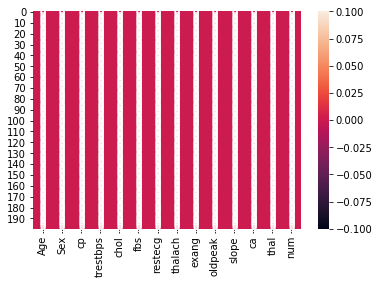

In [39]:
#Let's check if null values are present
sns.heatmap(df.isnull(),annot=True)
plt.show()

In [40]:
df.describe()

,Age,Sex,cp,restecg,num
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,59.350000,0.970000,3.505000,0.735000,1.520000
std,7.811697,0.171015,0.795701,0.683455,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000
25%,55.000000,1.000000,3.000000,0.000000,0.000000
50%,60.000000,1.000000,4.000000,1.000000,1.000000
75%,64.000000,1.000000,4.000000,1.000000,3.000000
max,77.000000,1.000000,4.000000,2.000000,4.000000


In [68]:
df.dtypes

Age          int64
Sex          int64
cp           int64
trestbps    object
chol        object
fbs         object
restecg      int64
thalach     object
exang       object
oldpeak     object
slope       object
ca          object
thal        object
num          int64
dtype: object

In [72]:
df.drop("trestbps",axis=1,inplace=True)
df.drop("chol",axis=1,inplace=True)
df.drop("fbs",axis=1,inplace=True)
df.drop("thalach",axis=1,inplace=True)
df.drop("exang",axis=1,inplace=True)
df.drop("oldpeak",axis=1,inplace=True)
df.drop("slope",axis=1,inplace=True)
df.drop("ca",axis=1,inplace=True)
df.drop("thal",axis=1,inplace=True)

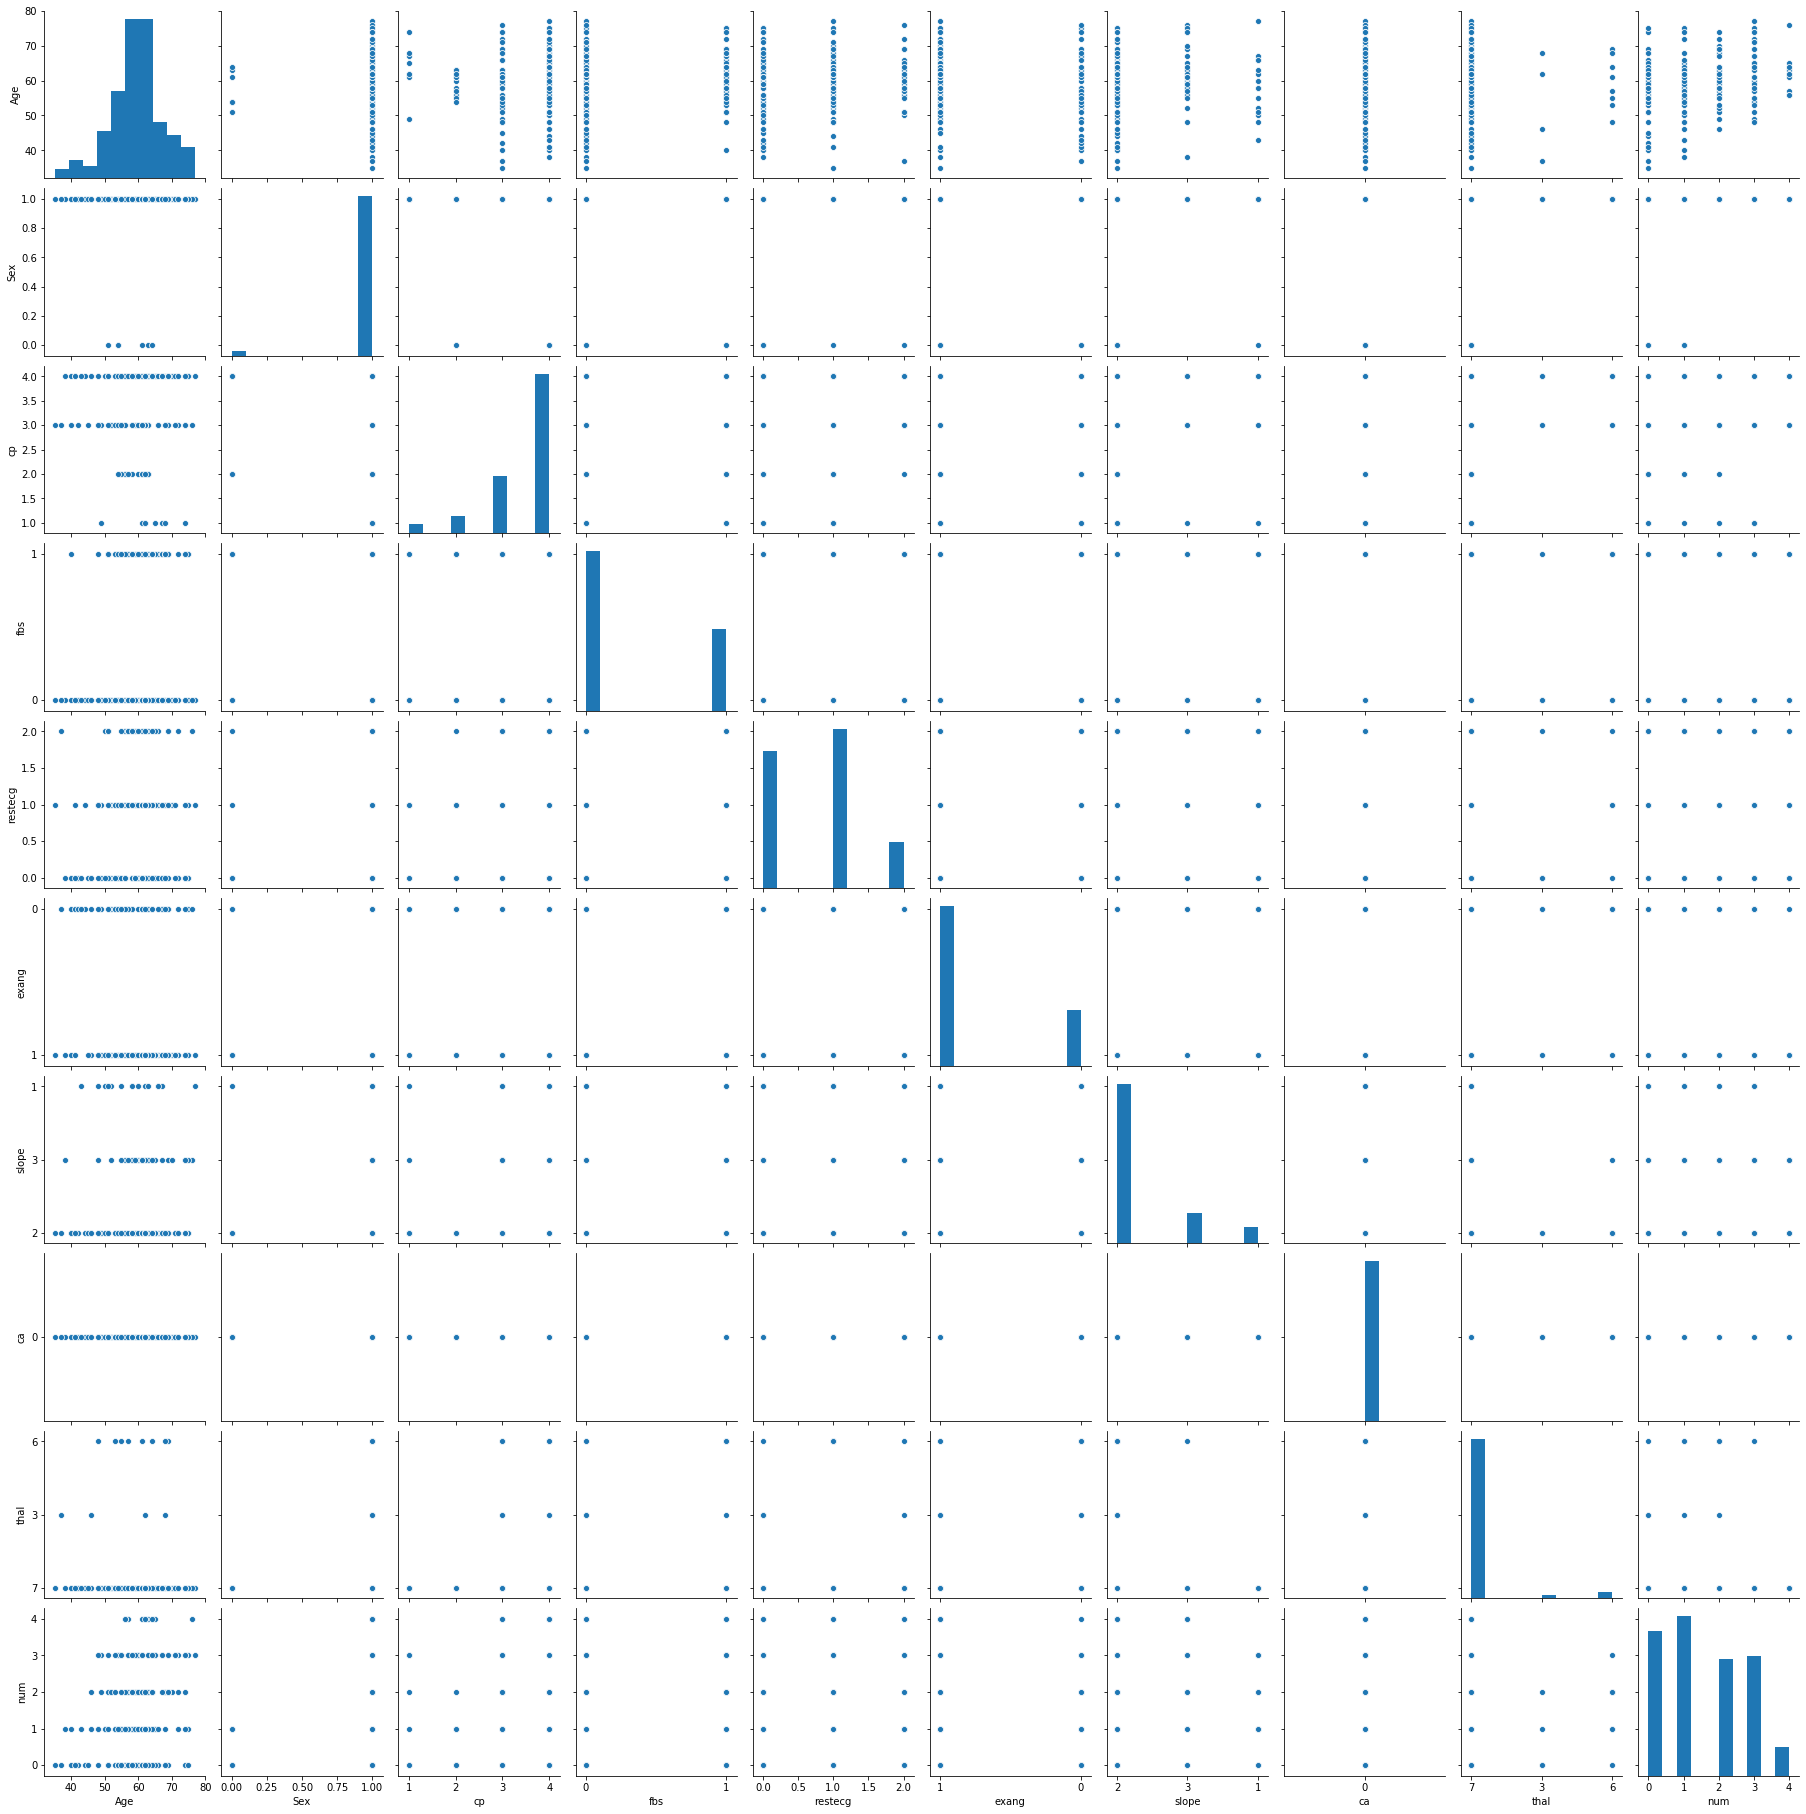

In [59]:
sns.pairplot(df)

In [45]:
df_cor=df.corr()
df_cor

,Age,Sex,cp,restecg,num
Age,1.000000,0.034230,-0.038280,0.002400,0.287289
Sex,0.034230,1.000000,0.038036,0.060621,0.147470
cp,-0.038280,0.038036,1.000000,0.034790,0.168210
restecg,0.002400,0.060621,0.034790,1.000000,-0.032800
num,0.287289,0.147470,0.168210,-0.032800,1.000000


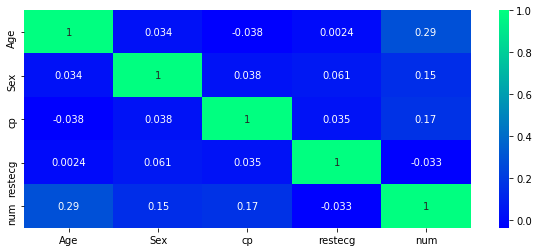

In [46]:
#Let's check correlation on a heatmap
plt.figure(figsize=(10,4))
sns.heatmap(df_cor,annot=True,cmap="winter")

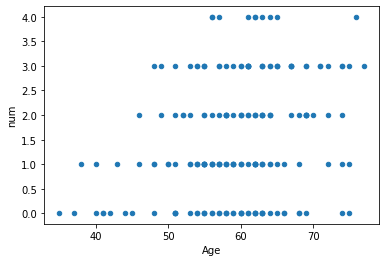

In [51]:
df.plot.scatter(x='Age',y='num')

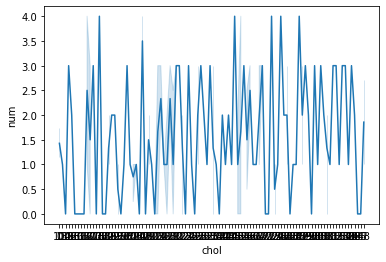

In [53]:
sns.lineplot(x="chol",y="num",data=df)

In [73]:
Y=df.iloc[:,0].values
X=df.iloc[:,1:13].values

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=1)

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,Y_train)
predY=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test,predY))

Accuracy: 0.05


In [87]:
print("\nConfusion matrix"+str(confusion_matrix(Y_test, y_pred)))
print("\nClassification report"+ str(classification_report(Y_test, y_pred)))


Confusion matrix[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 2 0 0 1 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0

In [89]:
from sklearn.externals import joblib
joblib.dump(clf,"heartdisease.pkl")

['heartdisease.pkl']